In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


**Step 1: Select a real-world dataset**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/onlineretail/OnlineRetail.csv", encoding="ISO-8859-1")  # Loading Data using encoding="ISO-8859-1" works for messy CSVs

In [4]:
df.head()  # Display first 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Step 2: Perform data preparation & cleaning**

In [5]:
df.shape  # Shape of dataset (rows, cols)

(541909, 8)

In [6]:
df.info()  # Info about datatypes & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()  # Summary statistics for numeric columns

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()  # Missing values count

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df.dropna(subset=["CustomerID"])  # Drop missing values in CustomerID

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])  # Convert InvoiceDate to datetime

In [11]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]  # Create TotalPrice column

**Step 3: Perform exploratory analysis & visualization Matplotlib - Resources**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

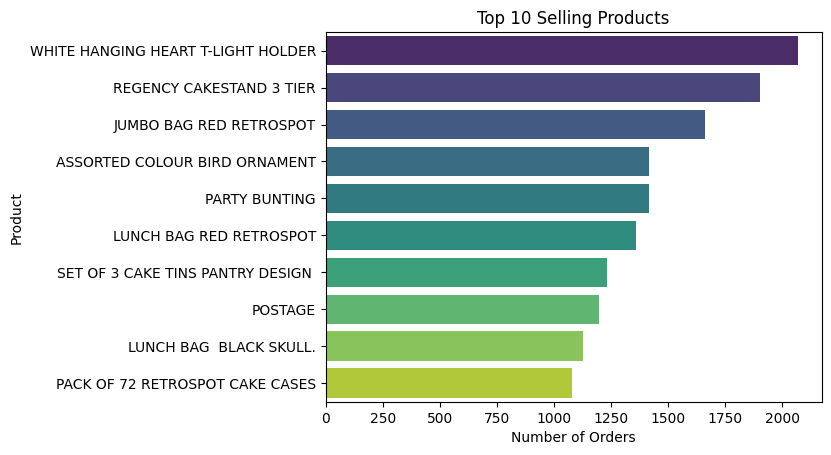

In [13]:
top_products = df["Description"].value_counts().head(10)
sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")
plt.title("Top 10 Selling Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product")
plt.show()

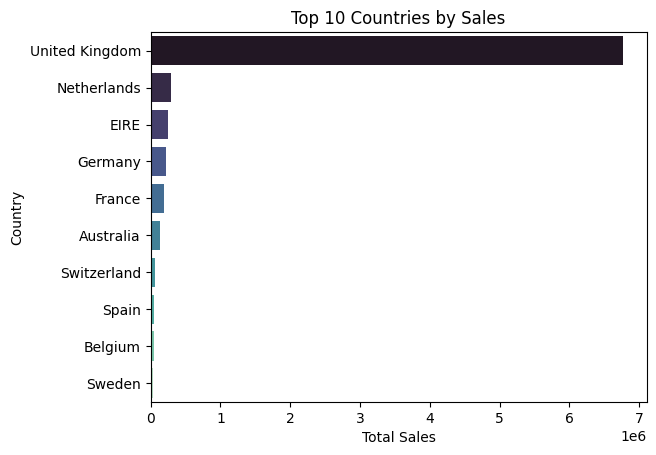

In [14]:
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="mako")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

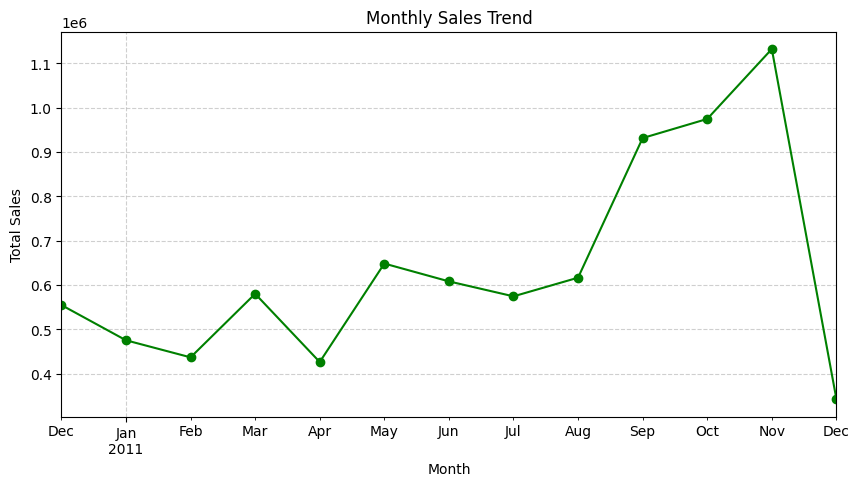

In [15]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

monthly_sales.plot(kind="line", figsize=(10,5), marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


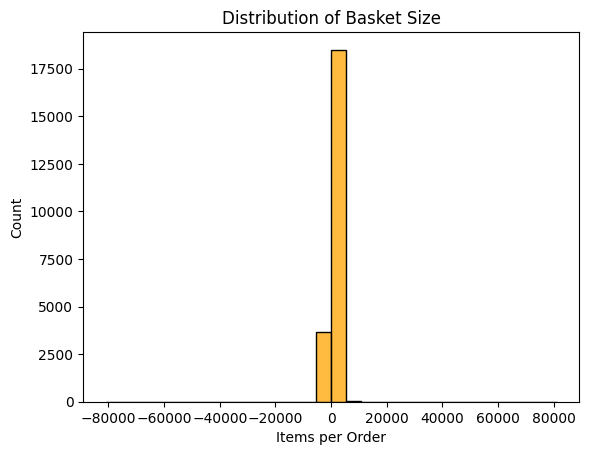

In [16]:
basket_size = df.groupby("InvoiceNo")["Quantity"].sum()
sns.histplot(basket_size, bins=30, color="orange", kde=False)
plt.title("Distribution of Basket Size")
plt.xlabel("Items per Order")
plt.show()

**Step 4: Ask & answer questions about the data**

**Q1: Which product is sold the most?**

In [17]:
print("Most sold product:", df["Description"].value_counts().idxmax())

Most sold product: WHITE HANGING HEART T-LIGHT HOLDER


**Q2: Which country generates the highest revenue?**

In [18]:
print("Top country by revenue:", df.groupby("Country")["TotalPrice"].sum().idxmax())

Top country by revenue: United Kingdom


**Q3: How do sales vary by month?**

In [19]:
print(monthly_sales)

Month
2010-12     554604.020
2011-01     475074.380
2011-02     436546.150
2011-03     579964.610
2011-04     426047.851
2011-05     648251.080
2011-06     608013.160
2011-07     574238.481
2011-08     616368.000
2011-09     931440.372
2011-10     974603.590
2011-11    1132407.740
2011-12     342506.380
Freq: M, Name: TotalPrice, dtype: float64


**Q4: What is the average basket size?**

In [20]:
print("Average basket size:", basket_size.mean())

Average basket size: 221.13059936908516


**Step 5: Summarize your inferences & write a conclusion**

UK dominates sales (since dataset is UK-based). Few products (like decorative items, stationery, toys) are ordered repeatedly, showing power of bestsellers. Sales peak during holiday seasons (Nov–Dec), indicating strong seasonal effect. Basket sizes are skewed — most customers buy few items, but a few bulk buyers drive large volumes.